In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-fullcsv/dataset_full.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("/kaggle/input/dataset-fullcsv/dataset_full.csv")
data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [5]:
print(data.describe())

        qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
count  88647.000000    88647.000000       88647.000000   88647.000000   
mean       2.191343        0.328810           0.113879       1.281781   
std        1.235636        1.119286           0.657767       1.893929   
min        1.000000        0.000000           0.000000       0.000000   
25%        2.000000        0.000000           0.000000       0.000000   
50%        2.000000        0.000000           0.000000       0.000000   
75%        2.000000        0.000000           0.000000       2.000000   
max       24.000000       35.000000          21.000000      44.000000   

       qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  \
count          88647.000000   88647.000000  88647.000000  88647.000000   
mean               0.009329       0.205861      0.022133      0.140885   
std                0.112568       0.954272      0.279652      0.924864   
min                0.000000       0.000000    

In [6]:
data.nunique() #how many unique value we have in each column

qty_dot_url             23
qty_hyphen_url          30
qty_underline_url       22
qty_slash_url           25
qty_questionmark_url     6
                        ..
qty_redirects           15
url_google_index         3
domain_google_index      3
url_shortened            2
phishing                 2
Length: 112, dtype: int64

In [7]:
data['domain_google_index'].unique() # to get what unique values are there in each column


array([ 0, -1,  1])

In [22]:
data.groupby('domain_google_index').describe()

qty_dot_url                                                \
                          count      mean       std  min  25%  50%  75%   max   
domain_google_index                                                             
-1                         88.0  2.011364  0.491171  1.0  2.0  2.0  2.0   3.0   
 0                      88292.0  2.191897  1.237309  1.0  2.0  2.0  2.0  24.0   
 1                        267.0  2.067416  0.747896  1.0  2.0  2.0  2.0   6.0   

                    qty_hyphen_url            ... url_shortened      phishing  \
                             count      mean  ...           75%  max    count   
domain_google_index                           ...                               
-1                            88.0  0.102273  ...           0.0  0.0     88.0   
 0                         88292.0  0.328773  ...           0.0  1.0  88292.0   
 1                           267.0  0.415730  ...           0.0  1.0    267.0   

                                                                  
                         mean       std  min  25%  50%  75%  max  
domain_google_index                                               
-1                   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
 0                   0.346385  0.475820  0.0  0.0  0.0  1.0  1.0  
 1                   0.239700  0.427702  0.0  0.0  0.0  0.0  1.0  

[3 rows x 888 columns]

In [9]:
data.isnull().sum() #checking for null values if any

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [10]:
import pandas as pd
correlations = []

for column in data.columns:
    correlation = data[column].corr(data['phishing'])
    correlations.append((column, correlation))

correlation_data = pd.DataFrame(correlations, columns=['Column', 'Correlation'])

correlation_data = correlation_data.sort_values(by='Correlation', ascending=False)

print(correlation_data)

                  Column  Correlation
111             phishing     1.000000
43   qty_slash_directory     0.746454
73       qty_dollar_file     0.745644
72      qty_hashtag_file     0.745644
61        qty_slash_file     0.745644
..                   ...          ...
31       qty_plus_domain          NaN
32   qty_asterisk_domain          NaN
33    qty_hashtag_domain          NaN
34     qty_dollar_domain          NaN
35    qty_percent_domain          NaN

[112 rows x 2 columns]


In [23]:
correlation_data

,Column,Correlation
111,phishing,1.000000
43,qty_slash_directory,0.746454
73,qty_dollar_file,0.745644
72,qty_hashtag_file,0.745644
61,qty_slash_file,0.745644
...,...,...
31,qty_plus_domain,NaN
32,qty_asterisk_domain,NaN
33,qty_hashtag_domain,NaN
34,qty_dollar_domain,NaN


In [11]:
negative_correlations = correlation_data[correlation_data['Correlation'] < 0]
print(negative_correlations)
#can be removed

                     Column  Correlation
21     qty_underline_domain    -0.004514
98               domain_spf    -0.005582
108        url_google_index    -0.008986
105            ttl_hostname    -0.010740
102         qty_ip_resolved    -0.029340
106     tls_ssl_certificate    -0.036249
107           qty_redirects    -0.061775
103         qty_nameservers    -0.066336
104          qty_mx_servers    -0.079580
101  time_domain_expiration    -0.165915
19           qty_dot_domain    -0.260480
100  time_domain_activation    -0.441875


In [12]:
dropped = data.drop(['qty_underline_domain', 'domain_spf', 'url_google_index', 'ttl_hostname', 'qty_ip_resolved', 'tls_ssl_certificate', 'qty_redirects', 'qty_nameservers', 'qty_mx_servers'], axis=1)

In [13]:
original=data.shape
new= dropped.shape
original = new
print(f"Original Shape: {original}")
print(f"New Shape: {new}")

Original Shape: (88647, 103)
New Shape: (88647, 103)


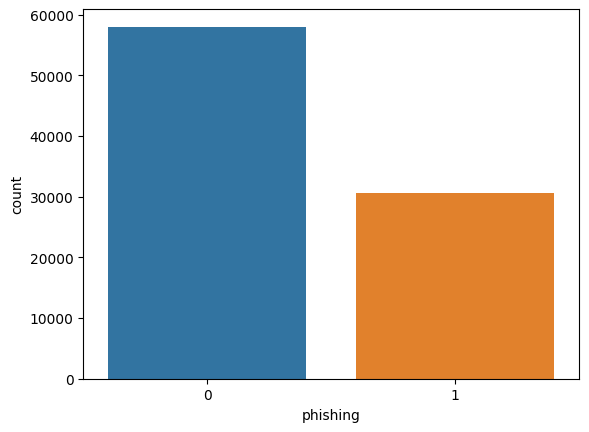

In [14]:
#before dropping
sns.countplot(x='phishing', data=data)
plt.show()

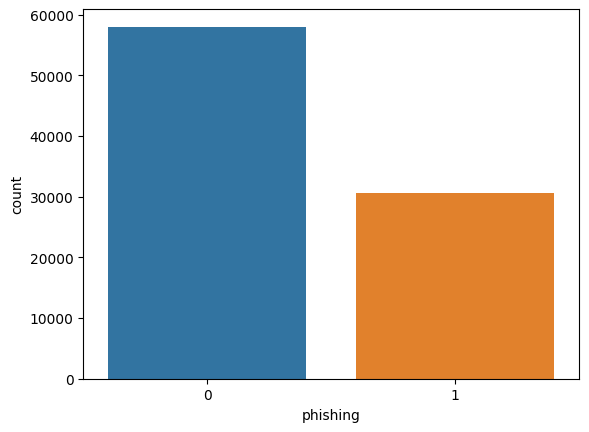

In [15]:
#after dropping
sns.countplot(x='phishing', data=dropped)
plt.show()

In [16]:
#Feature engineering 
rows, columns = dropped.shape

original_features = list(dropped.columns)

dataset_array = np.array(dropped)

features_indices = []
attributes = ['url', 'domain', 'directory', 'file', 'params']

new_dataset = {}

for index, name in enumerate(original_features):
    if 'qty' in name and name.split('_')[-1] in attributes:
        features_indices.append([index, name.split('_')[-1]])
    else:
        new_dataset[name] = dataset_array[:, index]


for index, attribute in features_indices:
  if attribute == 'domain':
    if f"qty_char_{attribute}" not in new_dataset.keys():
        new_dataset[f"qty_char_{attribute}"] = np.zeros(rows)
    
    new_dataset[f"qty_char_{attribute}"] += dataset_array[:,index]

df1 = pd.DataFrame(new_dataset).astype(int)
df1[df1<-1] = -1
df1


,length_url,domain_length,domain_in_ip,server_client_domain,directory_length,file_length,params_length,tld_present_params,email_in_url,time_response,asn_ip,time_domain_activation,time_domain_expiration,domain_google_index,url_shortened,phishing,qty_char_domain
0,25,17,0,0,8,7,-1,-1,0,0,60781,-1,-1,0,0,1,6
1,223,16,0,0,42,9,165,0,0,0,36024,579,150,0,0,1,7
2,15,14,0,0,1,0,-1,-1,0,0,4766,-1,-1,0,0,0,5
3,81,19,0,0,62,9,-1,-1,0,0,20454,-1,-1,0,0,1,9
4,19,19,0,0,-1,-1,-1,-1,0,0,53831,6998,306,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,23,23,0,0,-1,-1,-1,-1,0,0,8560,5509,334,0,0,0,9
88643,34,34,0,0,-1,-1,-1,-1,0,0,26496,5046,431,0,0,0,16
88644,70,22,0,0,48,11,-1,-1,0,0,394695,1844,712,0,0,1,7
88645,28,27,0,0,1,0,-1,-1,0,0,47583,-1,-1,0,0,1,7


In [17]:
df1.columns

Index(['length_url', 'domain_length', 'domain_in_ip', 'server_client_domain',
       'directory_length', 'file_length', 'params_length',
       'tld_present_params', 'email_in_url', 'time_response', 'asn_ip',
       'time_domain_activation', 'time_domain_expiration',
       'domain_google_index', 'url_shortened', 'phishing', 'qty_char_domain'],
      dtype='object')

In [18]:
corr = df1.corr()
plt.figure(figsize=(100, 100))
sns.heatmap(corr, annot=True)
plt.show()

In [19]:
print(df1.describe()) 

         length_url  domain_length  domain_in_ip  server_client_domain  \
count  88647.000000   88647.000000  88647.000000          88647.000000   
mean      36.347615      18.560820      0.002267              0.004501   
std       46.191590       6.598694      0.047564              0.066939   
min        4.000000       4.000000      0.000000              0.000000   
25%       17.000000      14.000000      0.000000              0.000000   
50%       22.000000      18.000000      0.000000              0.000000   
75%       38.000000      22.000000      0.000000              0.000000   
max     4165.000000     231.000000      1.000000              1.000000   

       directory_length   file_length  params_length  tld_present_params  \
count      88647.000000  88647.000000   88647.000000        88647.000000   
mean          10.857694      2.743793       5.273185           -0.891739   
std           24.352634     13.572252      34.937007            0.381593   
min           -1.000000     -